<a href="https://colab.research.google.com/github/Yhemisol/4B1b/blob/master/ML_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
!ls

mushrooms.csv  sample_data


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mushrooms.csv has 8124 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./mushrooms.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mushrooms.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 23 columns


In [ ]:
df1.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Ensure the number of rows is an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()




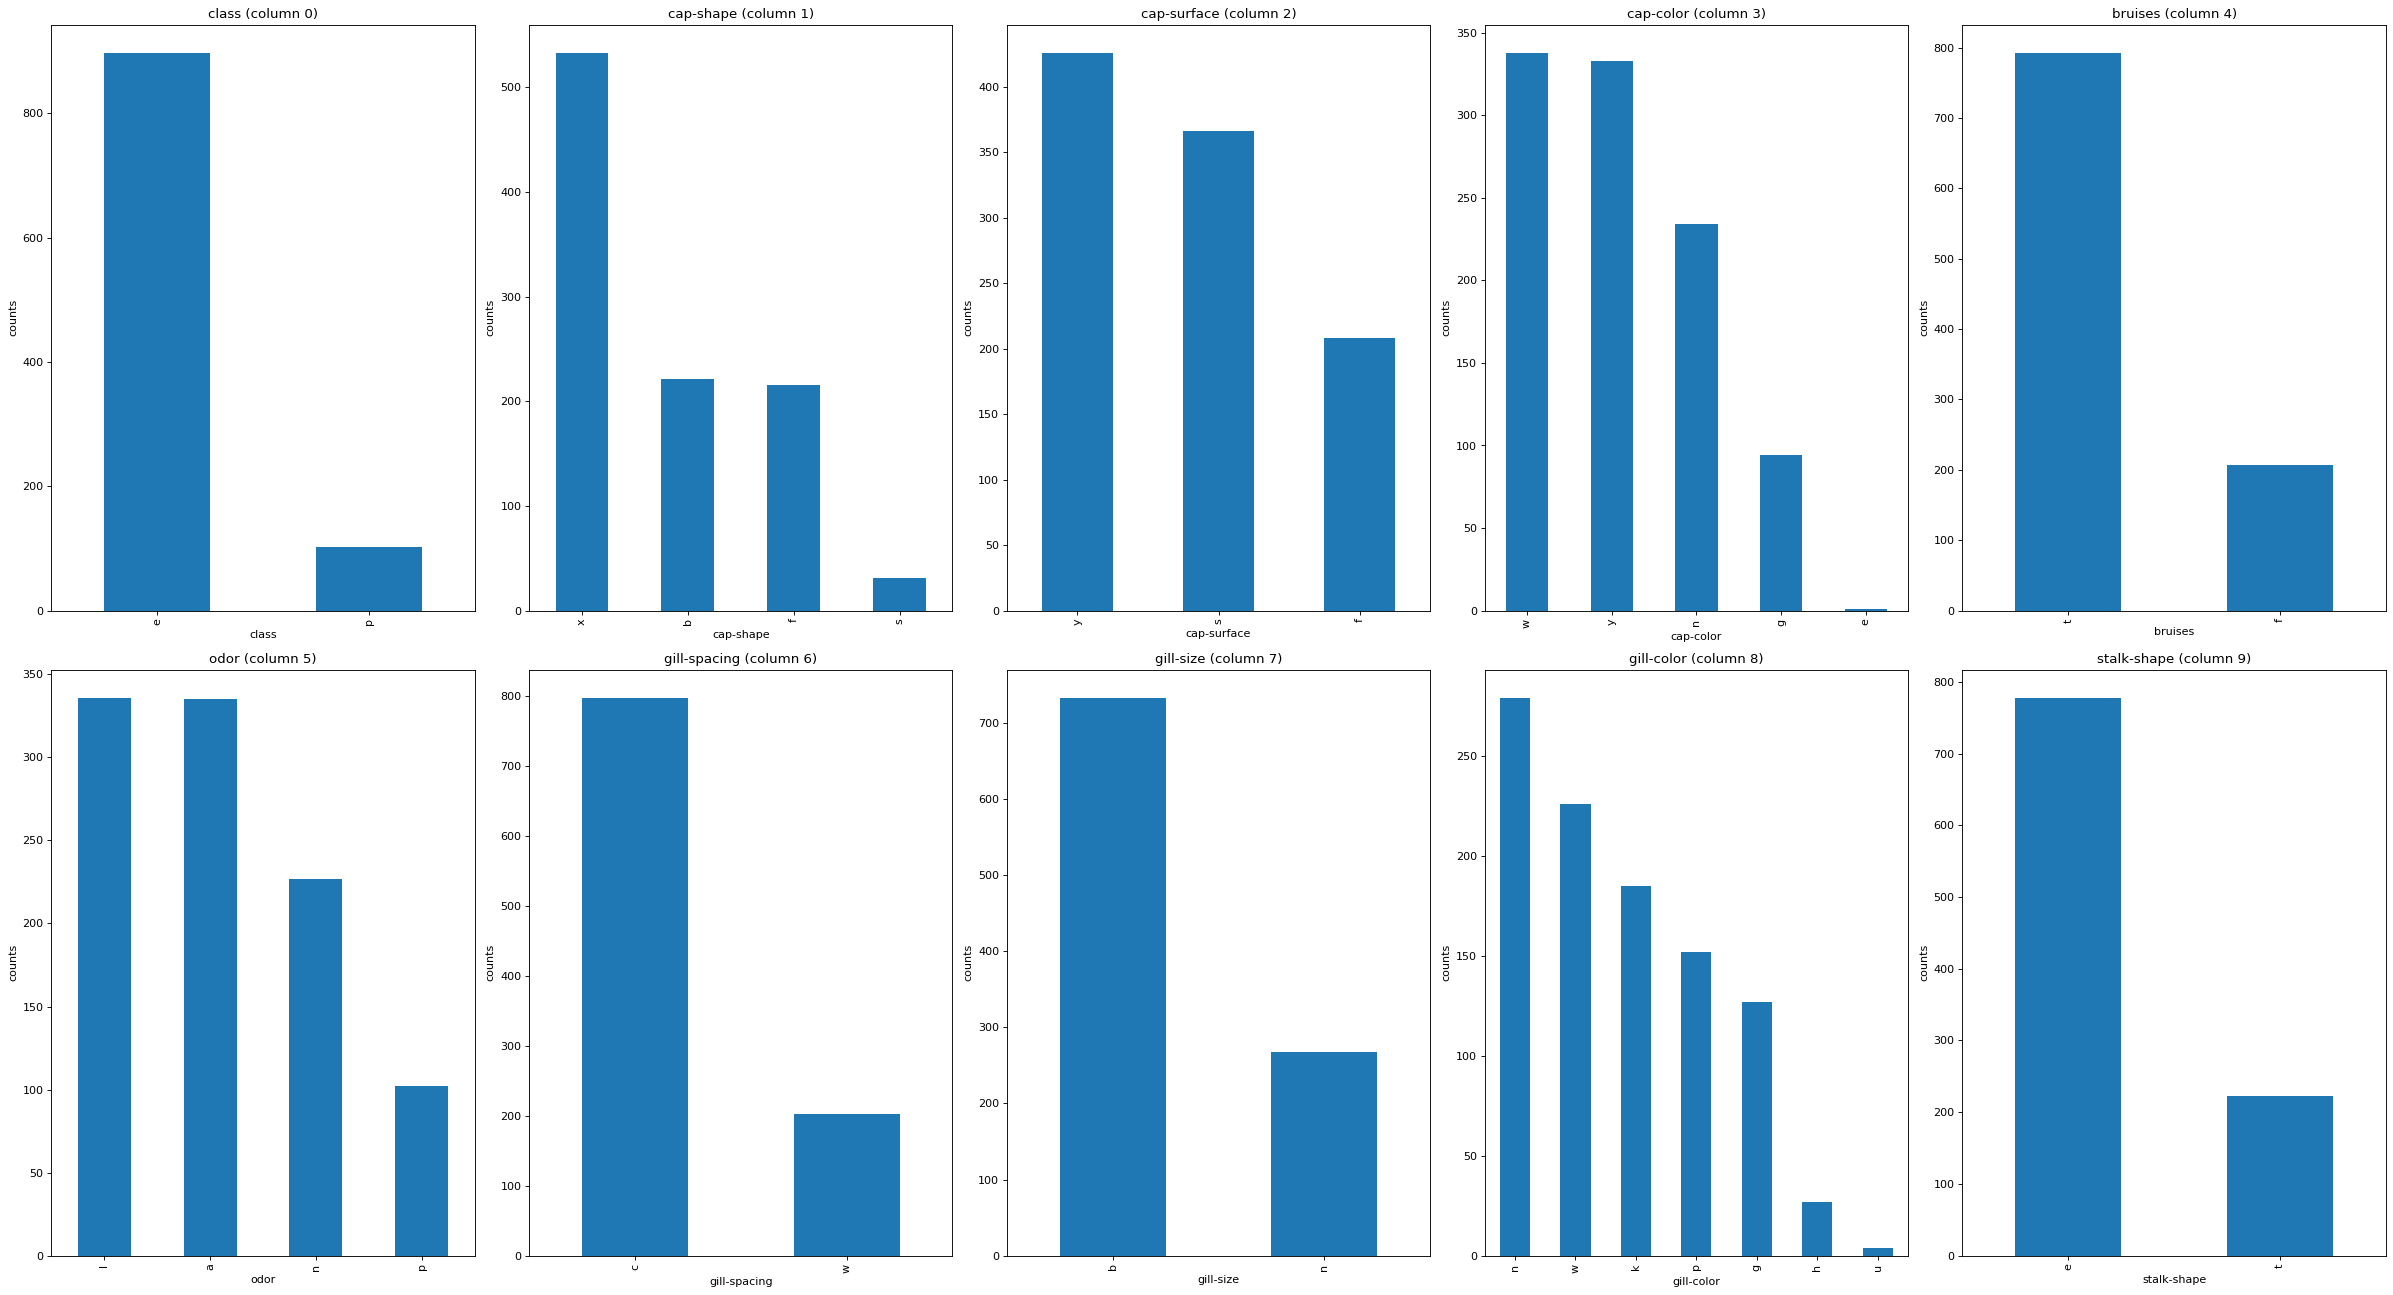

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')  # Correctly specify axis as a keyword argument
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
# Creating a sample DataFrame with numerical data
data = {
    'A': np.random.randn(100),
    'B': np.random.rand(100) * 100,
    'C': np.random.randn(100),
    'D': np.random.randint(1, 100, size=100)
}
df1 = pd.DataFrame(data)


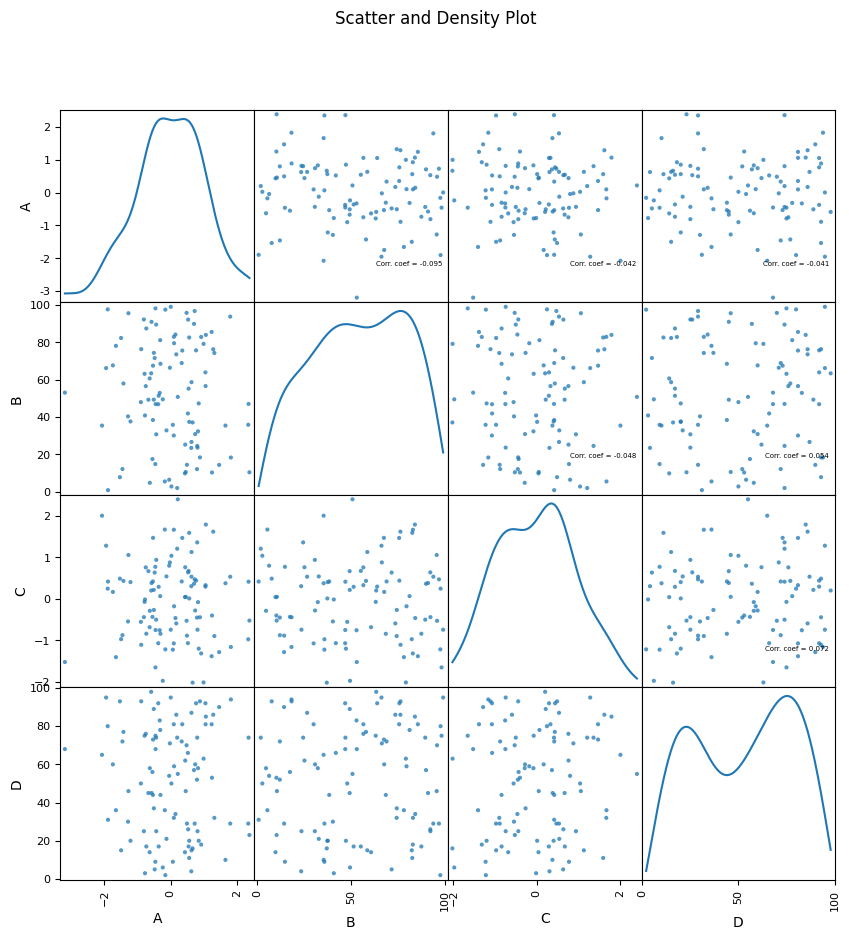

In [ ]:
plotScatterMatrix(df1, 10, 5)


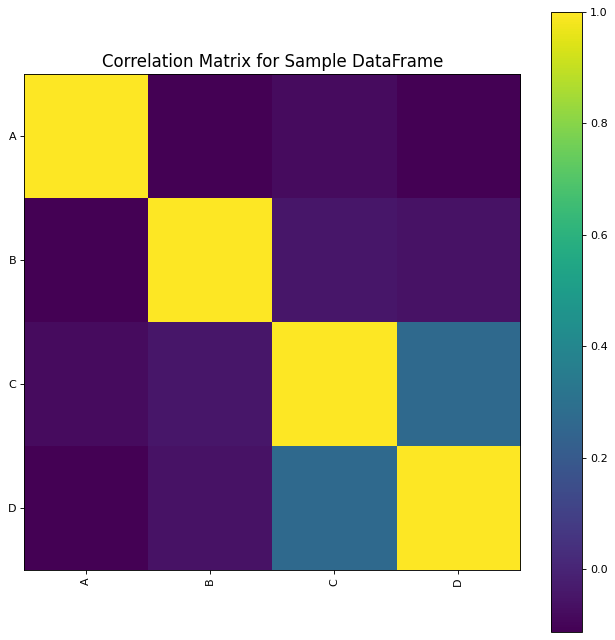

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName  # Ensure your DataFrame has an attribute 'dataframeName'
    df = df.dropna(axis='columns')  # drop columns with NaN, correctly specify axis as a keyword argument
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Example DataFrame and calling the function
df = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.rand(100) * 100,
    'C': np.random.randn(100),
    'D': np.random.randint(1, 100, size=100)
})

# Assuming df has a property called dataframeName which is used in the function
df.dataframeName = "Sample DataFrame"
plotCorrelationMatrix(df, 10)
